In [1]:
import numpy as np
import pandas as pd
from __future__ import division

In [2]:
df = pd.read_csv('referral.csv')

In [3]:
print 'Are there nan? %s' % df.isnull().values.any()
print 'Data shape, rows: %d x columns: %d' % (df.shape[0], df.shape[1])
print df.shape
df.describe()

Are there nan? False
Data shape, rows: 97341 x columns: 6
(97341, 6)


,user_id,money_spent,is_referral
count,97341.000000,97341.000000,97341.000000
mean,6354.801029,44.692360,0.287823
std,5682.991186,22.791839,0.452751
min,1.000000,10.000000,0.000000
25%,2020.000000,27.000000,0.000000
50%,4053.000000,42.000000,0.000000
75%,10286.000000,59.000000,1.000000
max,20000.000000,220.000000,1.000000


In [4]:
print 'money_spent: %s' % type(df.money_spent[0])

money_spent: <type 'numpy.int64'>


In [5]:
for i in range(len(df.columns)):
    print '%s: %s' % (df.columns[i], type(df.iloc[0, i]))
    

user_id: <type 'numpy.int64'>
date: <type 'str'>
country: <type 'str'>
money_spent: <type 'numpy.int64'>
is_referral: <type 'numpy.int64'>
device_id: <type 'str'>


#### Assign the start date of the referral program

In [6]:
start_date = '2015-10-31'
end_date = df['date'][-1:].values[0]

mask = (df['date'] > start_date) & (df['date'] <= end_date)
before_mask = (df['date'] <= start_date)

z = {False: 'Before', True: 'After'}
df['program_status'] = pd.Series(mask, index=df.index).map(z)


In [7]:
referred_group = df[df['is_referral'].values == 1]
nonreferred_group = df[df['is_referral'].values == 0]

print 'referred group shape: %d, %d' % (referred_group.shape[0], referred_group.shape[1])
print 'nonreferred group shape: %d, %d' % (nonreferred_group.shape[0], nonreferred_group.shape[1])

referred group shape: 28017, 7
nonreferred group shape: 69324, 7


(Per above:) There are far more people in the nonreferred group.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

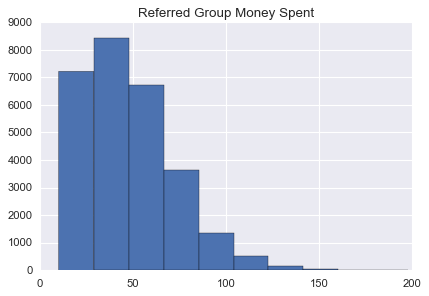

In [9]:
referred_hist = plt.figure()
plt.title('Referred Group Money Spent')
referred_group.money_spent.hist()

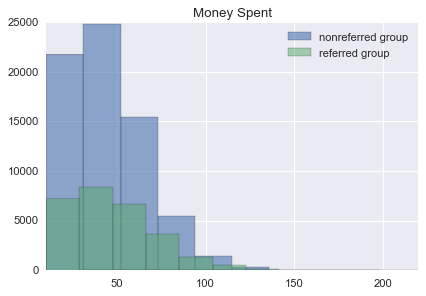

In [10]:
plt.figure()
plt.xlim(df.money_spent.min(), df.money_spent.max())
plt.hist(nonreferred_group.money_spent.values, alpha=0.6, label='nonreferred group')
plt.hist(referred_group.money_spent.values, alpha=0.5, label='referred group')
plt.legend()
plt.title('Money Spent')

#### Show the dates we're working with

In [11]:
df.date.unique()

array(['2015-10-03', '2015-10-04', '2015-10-05', '2015-10-06',
       '2015-10-07', '2015-10-08', '2015-10-09', '2015-10-10',
       '2015-10-11', '2015-10-12', '2015-10-13', '2015-10-14',
       '2015-10-15', '2015-10-16', '2015-10-17', '2015-10-18',
       '2015-10-19', '2015-10-20', '2015-10-21', '2015-10-22',
       '2015-10-23', '2015-10-24', '2015-10-25', '2015-10-26',
       '2015-10-27', '2015-10-28', '2015-10-29', '2015-10-30',
       '2015-10-31', '2015-11-01', '2015-11-02', '2015-11-03',
       '2015-11-04', '2015-11-05', '2015-11-06', '2015-11-07',
       '2015-11-08', '2015-11-09', '2015-11-10', '2015-11-11',
       '2015-11-12', '2015-11-13', '2015-11-14', '2015-11-15',
       '2015-11-16', '2015-11-17', '2015-11-18', '2015-11-19',
       '2015-11-20', '2015-11-21', '2015-11-22', '2015-11-23',
       '2015-11-24', '2015-11-25', '2015-11-26', '2015-11-27'], dtype=object)

In [12]:
df_after_program_start = df.loc[mask]
referred_group_after_program_start = df_after_program_start[df_after_program_start['is_referral'].values == 1]
nonreferred_group_after_program_start = df_after_program_start[df_after_program_start['is_referral'].values == 0]

df_before_program_start = df.loc[before_mask]
referred_group_before_program_start = df_before_program_start[df_before_program_start['is_referral'].values == 1]
nonreferred_group_before_program_start = df_before_program_start[df_before_program_start['is_referral'].values == 0]

In [13]:
referred_mask = (referred_group['date'] > start_date) & (referred_group['date'] <= end_date)
referred_before_mask = (referred_group['date'] <= start_date)

nonreferred_mask = (nonreferred_group['date'] > start_date) & (nonreferred_group['date'] <= end_date)
nonreferred_before_mask = (nonreferred_group['date'] <= start_date)

#### Simple checks to make sure counts add up:

In [14]:
print df.shape
print referred_group_before_program_start.shape
print referred_group_after_program_start.shape
print nonreferred_group_before_program_start.shape
print nonreferred_group_after_program_start.shape

(97341, 7)
(1810, 7)
(26207, 7)
(48764, 7)
(20560, 7)


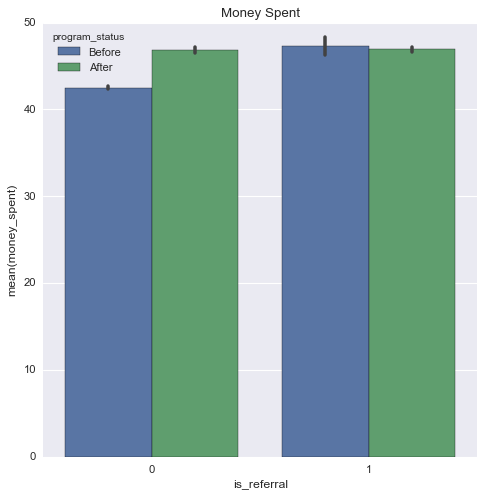

In [15]:
plt.figure()
plt.figure(figsize=(7, 7), facecolor='w', edgecolor='k')
sns.barplot(x='is_referral', y='money_spent', hue='program_status', data=df)
plt.title('Money Spent')
plt.show()

In [16]:
print (nonreferred_group['program_status'] == 'Before').size
print (nonreferred_group['program_status'] == 'After').size

69324
69324


In [17]:
unique_users_referred_group = referred_group['user_id'].unique()
unique_users_nonreferred_group = nonreferred_group['user_id'].unique()

In [18]:
referred_group.head(3)

,user_id,date,country,money_spent,is_referral,device_id,program_status
48170,5016,2015-10-31,DE,45,1,OGAZARJAGCPUQ,Before
48171,5023,2015-10-31,US,40,1,INLYDRPTBYTGQ,Before
48172,5024,2015-10-31,FR,42,1,QZUBRKLLCIOQH,Before


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
len(unique_users_referred_group)

12715

In [217]:
lm_referred = ols('money_spent ~ C(program_status, Sum)', data=referred_group).fit()

In [219]:
print sm.stats.anova_lm(lm_referred, typ=1) # Type 2 ANOVA DataFrame

                           df           sum_sq     mean_sq         F    PR(>F)
C(program_status, Sum)      1       244.489011  244.489011  0.410757  0.521591
Residual                28015  16674966.956612  595.215669       NaN       NaN


In [221]:
lm_referred = ols('money_spent ~ C(program_status*is_referral) + C(is_referral)', data=df).fit()
print sm.stats.anova_lm(lm_referred, typ=1) # Type 2 ANOVA DataFrame

                                    df           sum_sq        mean_sq  \
C(program_status * is_referral)      2    203230.754561  101615.377280   
Residual                         97338  50361778.653455     517.390728   

                                          F        PR(>F)  
C(program_status * is_referral)  196.399688  7.522096e-86  
Residual                                NaN           NaN  


In [224]:
import statsmodels.formula.api as smf

In [ ]:
#mixedlm("Weight ~ Time", data, groups=data["Pig"])
mixed_fit = smf.mixedlm("money_spent ~ program_status", df, groups=df['is_referral']).fit()

In [ ]:
print(mdf.summary())